# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [71]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology
from skimage import filters
from skimage.measure import label
from skimage.measure import regionprops
from skimage.draw import circle_perimeter

Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

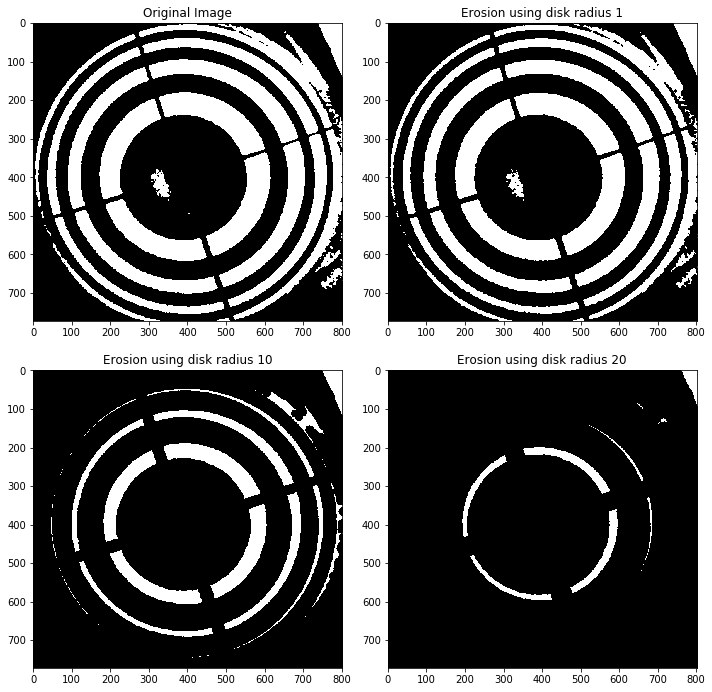

In [8]:
#Import the FindingContours image
img_path = './images/'
img_name = 'FindingContours.png'
finding_contours_im = io.imread(img_path.__add__(img_name))

disk1 = morphology.disk(1);
disk10 = morphology.disk(10);
disk20 = morphology.disk(20);

#Shrinking the object using erosion
image_erosion1 = morphology.erosion(finding_contours_im,disk1)
image_erosion10 = morphology.erosion(finding_contours_im,disk10)
image_erosion20 = morphology.erosion(finding_contours_im,disk20)

#Display the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
io.imshow(finding_contours_im)
plt.title("Original Image")

plt.subplot(222)
io.imshow(image_erosion1)
plt.title("Erosion using disk radius 1")

plt.subplot(223)
io.imshow(image_erosion10)
plt.title("Erosion using disk radius 10")

plt.subplot(224)
io.imshow(image_erosion20)
plt.title("Erosion using disk radius 20");

#Erosion shrinks the white ares of the image, increasing the shrinkage as the disk size increases


** Q.1.2 Dilation **

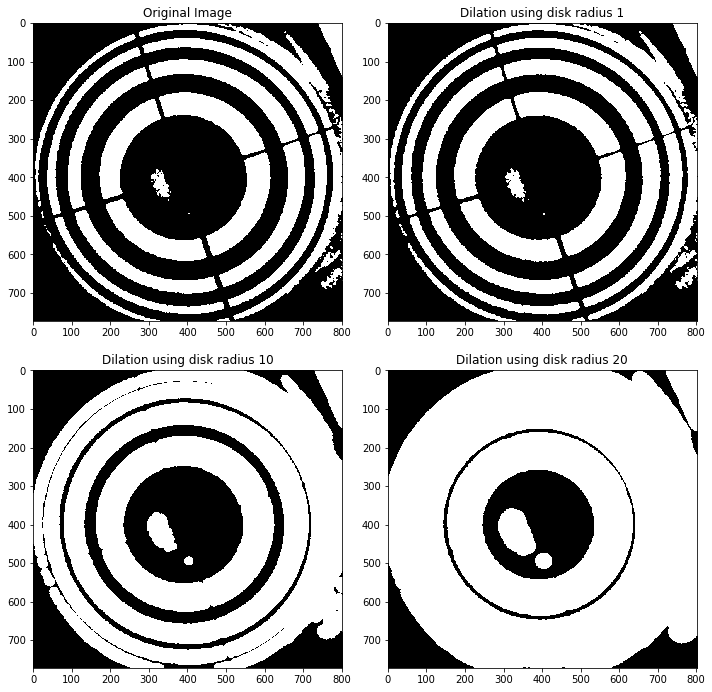

In [9]:
#Thickening the object using dilation

image_dilation1 = morphology.dilation(finding_contours_im,disk1)
image_dilation10 = morphology.dilation(finding_contours_im,disk10)
image_dilation20 = morphology.dilation(finding_contours_im,disk20)

fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
io.imshow(finding_contours_im)
plt.title("Original Image")

plt.subplot(222)
io.imshow(image_dilation1)
plt.title("Dilation using disk radius 1")

plt.subplot(223)
io.imshow(image_dilation10)
plt.title("Dilation using disk radius 10")

plt.subplot(224)
io.imshow(image_dilation20)
plt.title("Dilation using disk radius 20");

#Dilation increases the thickness of the white areas of the image, 
#increasing the thickening as the disk size increases.


** Q.1.3 Opening **

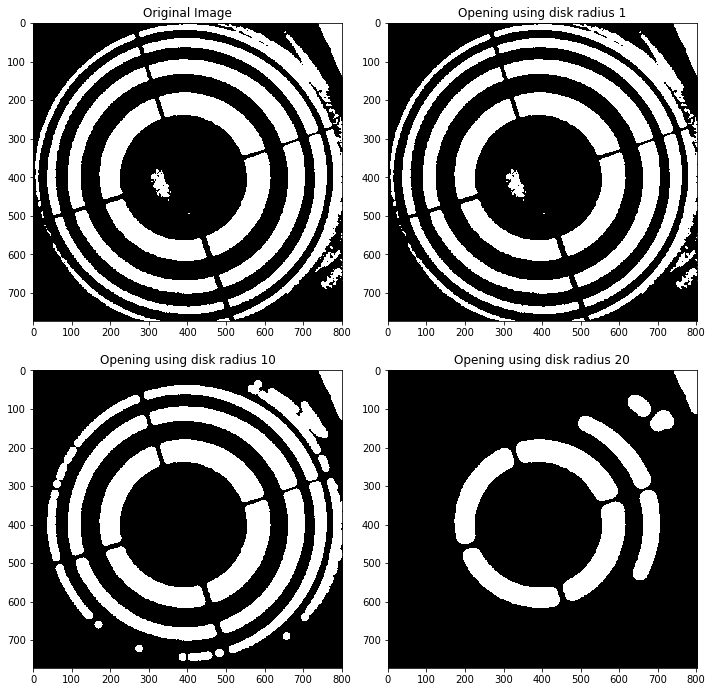

In [10]:
#Doing erosion then dilation 

image_opening1 = morphology.dilation(morphology.erosion(finding_contours_im,disk1), disk1)
image_opening10 = morphology.dilation(morphology.erosion(finding_contours_im,disk10), disk10)
image_opening20 = morphology.dilation(morphology.erosion(finding_contours_im,disk20), disk20)

fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
io.imshow(finding_contours_im)
plt.title("Original Image")

plt.subplot(222)
io.imshow(image_opening1)
plt.title("Opening using disk radius 1")

plt.subplot(223)
io.imshow(image_opening10)
plt.title("Opening using disk radius 10")

plt.subplot(224)
io.imshow(image_opening20)
plt.title("Opening using disk radius 20");

#Opening takes the images produced in the erosion step (with decreased areas of white), and then thickens those
#areas, producing an image with little noise. (noise goes black)

** Q.1.4 Closing**

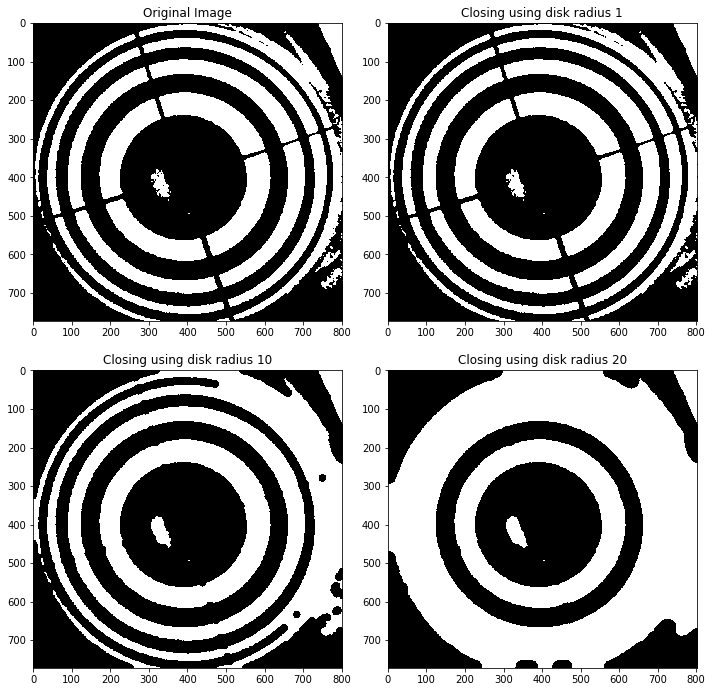

In [11]:
#Doing dilation then erosion
image_closing1 = morphology.erosion(morphology.dilation(finding_contours_im,disk1), disk1)
image_closing10 = morphology.erosion(morphology.dilation(finding_contours_im,disk10), disk10)
image_closing20 = morphology.erosion(morphology.dilation(finding_contours_im,disk20), disk20)

fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
io.imshow(finding_contours_im)
plt.title("Original Image")

plt.subplot(222)
io.imshow(image_closing1)
plt.title("Closing using disk radius 1")

plt.subplot(223)
io.imshow(image_closing10)
plt.title("Closing using disk radius 10")

plt.subplot(224)
io.imshow(image_closing20)
plt.title("Closing using disk radius 20");

#Closing takes the imaged produced by dilation (with increased areas of white), and then erodes them,
#shrinking the areas of white. Depending on the disk size, the white still increases due to the dilation
#term. Noise is decreased and turns white.

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

Erosion takes a binary image and shrinks the size of the white areas, while dilation thickens those areas. Opening combines erosion, then deletion, effectively decreasing the size of white, due to the first term erosion, and then increasing those areas using dilation, but they are now smoother. This can be seen comparing between the disks of 1 and 10 in the openning section. Closing performs dilation, then erosion, erradicating the noise in the image by first increasing the thickness, and then shrinking the object. This means the final image will have increased white. Any of these methods can be used depending on the desired output image.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/Users/briannaburton/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/briannaburton/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(780, 780)

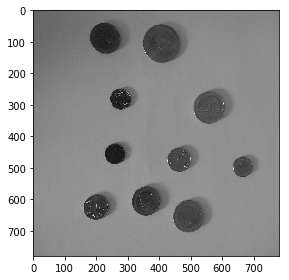

In [35]:
img_name = 'coins.jpg'
coins_im = img_as_ubyte(rescale(io.imread(img_path.__add__(img_name),as_grey = True),0.25))
io.imshow(coins_im);

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

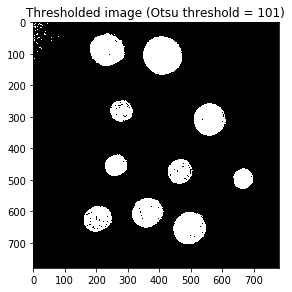

In [78]:
otsu_threshold = filters.threshold_otsu(coins_im)
coins_otsu = coins_im < otsu_threshold

io.imshow(coins_otsu);
plt.title("Thresholded image (Otsu threshold = 101)");

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

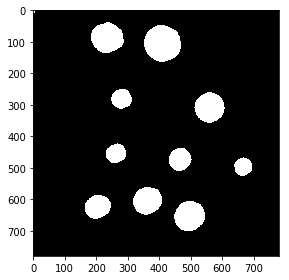

In [89]:
#Use closing and then dilation to clean the threshold image
cleaned_coins = morphology.dilation(morphology.erosion(morphology.dilation(coins_otsu,morphology.disk(2)),morphology.disk(10)),morphology.disk(5))
io.imshow(cleaned_coins);

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


The number of reigons is 11
The radius of the reigon is 49 pixels.
The radius of the reigon is 58 pixels.
The radius of the reigon is 31 pixels.
The radius of the reigon is 47 pixels.
The radius of the reigon is 31 pixels.
The radius of the reigon is 35 pixels.
The radius of the reigon is 28 pixels.
The radius of the reigon is 44 pixels.
The radius of the reigon is 39 pixels.
The radius of the reigon is 48 pixels.


/Users/briannaburton/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


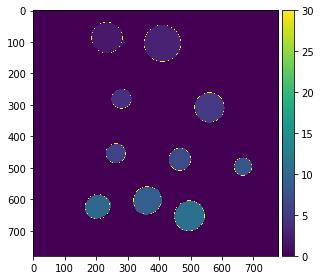

In [124]:
coins_label = label(cleaned_coins, return_num=False)
regions = regionprops(coins_label)
#io.imshow(coins_label)
print('The number of reigons is {}'.format(len(regions)))

for i in range (1,len(regions)):
    radius = int(regions[i].equivalent_diameter / 2.)
    circle = circle_perimeter(int(regions[i].centroid[0]),int(regions[i].centroid[1]),radius)
    coins_label[circle[0],circle[1]] = 30
    print('The radius of the reigon is {} pixels.'.format(radius))
    
io.imshow(coins_label)

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 